        country  iso  ifs           pop       rgdpmad   rgdpbarro  rconsbarro  \
year                                                                            
1870  Australia  AUS  193   1775.000000   3273.239437   13.836157   21.449734   
1871  Australia  AUS  193   1675.000000   3298.507463   13.936864   19.930801   
1872  Australia  AUS  193   1722.000000   3553.426249   15.044247   21.085006   
1873  Australia  AUS  193   1769.000000   3823.629169   16.219443   23.254910   
1874  Australia  AUS  193   1822.000000   3834.796926   16.268228   23.458050   
...         ...  ...  ...           ...           ...         ...         ...   
2016  Australia  AUS  193  23857.363103  27319.882367  114.165563  108.954655   
2017  Australia  AUS  193  24231.999022  27547.339066  114.841156  109.560251   
2018  Australia  AUS  193  24621.307366  27883.914290  116.425918  110.951172   
2019  Australia  AUS  193  24999.855932  27986.814401  117.145649  111.199681   
2020  Australia  AUS  193  2

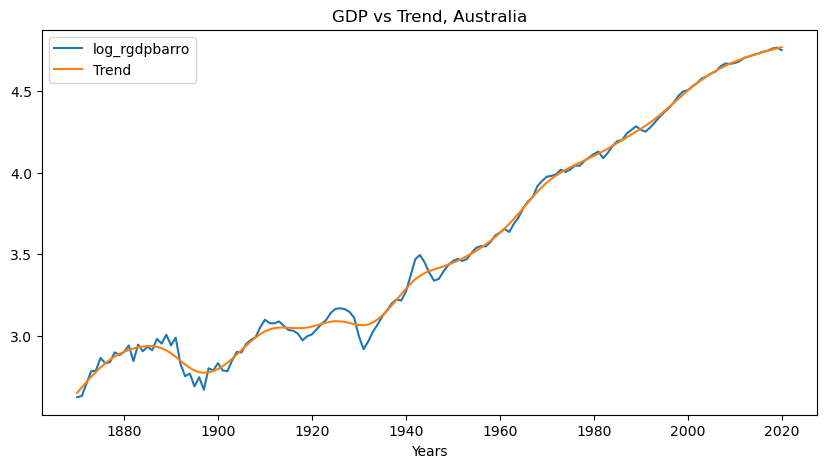

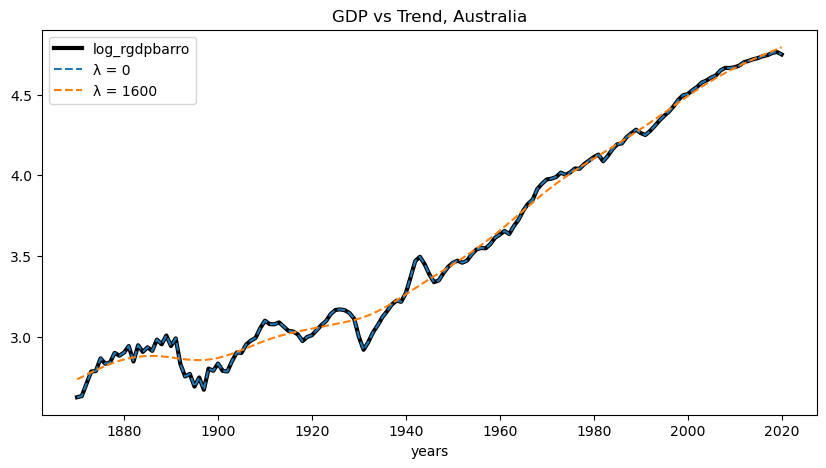

In [1]:
#CODE BY CHAIROPOULOU ALEXANDRA AND PAPANGELI MARIA
#1 BUSINESS CYCLE ANALYSIS OF AUSTRALIA
import pandas as pd
import numpy as np
import statsmodels.api as sm

!pip install pandas openpyxl
import pandas as pd
df = pd.read_excel('AUS_macro_data..xlsx', sheet_name='Sheet1', index_col= 'year')  
print(df)

col =['rgdpbarro' ]
df2 = df[col]
df2
df2_log=np.log(df2)
df2_log
df2_log.columns=['log_rgdpbarro']
df2_log




from statsmodels.tsa.filters.hp_filter import hpfilter

gdp_cycle,gdp_trend = hpfilter(df2_log['log_rgdpbarro'], lamb=100)
gdp_segr = df2_log[['log_rgdpbarro']]
gdp_segr['cycle']= gdp_cycle
gdp_segr['trend'] = gdp_trend

gdp_segr



import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df2_log['log_rgdpbarro'].plot(label='log_rgdpbarro') 
gdp_trend.plot(label='Trend')
plt.title('GDP vs Trend, Australia') 
plt.xlabel('Years') 
plt.legend() 

plt.show()

gdp_cycle,gdp_trend = sm.tsa.filters.hpfilter(df2_log['log_rgdpbarro'], lamb=0)
gdp_segr = df2_log[['log_rgdpbarro']]
gdp_segr['cycle']= gdp_cycle
gdp_segr['trend'] = gdp_trend

gdp_cycle2,gdp_trend2 = sm.tsa.filters.hpfilter(df2_log['log_rgdpbarro'], lamb=1600)
gdp_segr2 = df2_log[['log_rgdpbarro']]
gdp_segr2['cycle']= gdp_cycle2
gdp_segr2['trend'] = gdp_trend2

plt.figure(figsize=(10,5))

df2_log['log_rgdpbarro'].plot(label='log_rgdpbarro', color='black', lw = 3) 
gdp_trend.plot(label='λ = 0', ls = 'dashed') 
gdp_trend2.plot(label='λ = 1600', ls = 'dashed')

plt.title('GDP vs Trend, Australia') 

plt.xlabel('years') 
plt.legend() 

plt.show()



In [2]:
df4=df['rgdpbarro']*df['iy']
df['rinvbarro']=df4
df4
col2=['rgdpbarro','rconsbarro','rinvbarro','imports','exports']
df3=df[col2]
df3

,rgdpbarro,rconsbarro,rinvbarro,imports,exports
year,,,,,
1870,13.836157,21.449734,1.511816,36.0,37.0
1871,13.936864,19.930801,1.457505,34.0,46.0
1872,15.044247,21.085006,1.962341,38.0,53.0
1873,16.219443,23.254910,2.027207,49.0,50.0
1874,16.268228,23.458050,2.309436,49.0,54.0
...,...,...,...,...,...
2016,114.165563,108.954655,28.011968,196269.0,258469.0
2017,114.841156,109.560251,27.804049,228779.0,301334.0
2018,116.425918,110.951172,27.977485,235385.0,344615.0


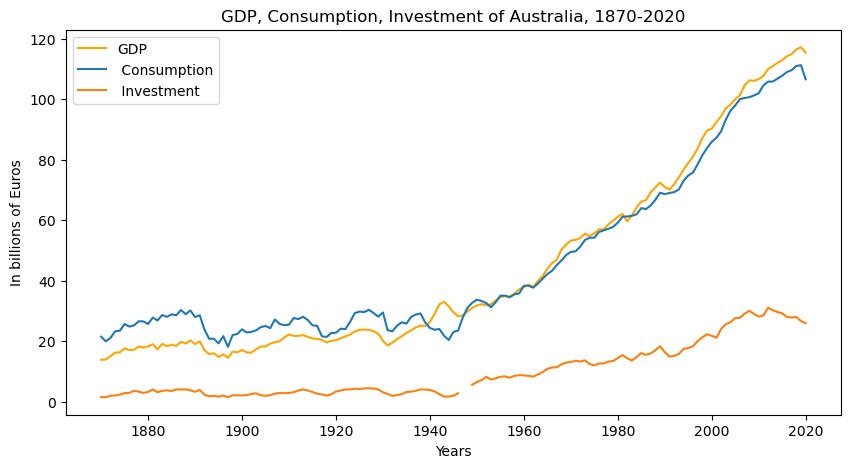

In [3]:
plt.figure(figsize=(10,5)) 

df['rgdpbarro'].plot(label='GDP', color='orange') 
df['rconsbarro'].plot(label=' Consumption') 
df['rinvbarro'].plot(label=' Investment')


plt.title('GDP, Consumption, Investment of Australia, 1870-2020') 
plt.xlabel('Years') 

plt.ylabel('In billions of Euros')

plt.legend() 

plt.show()

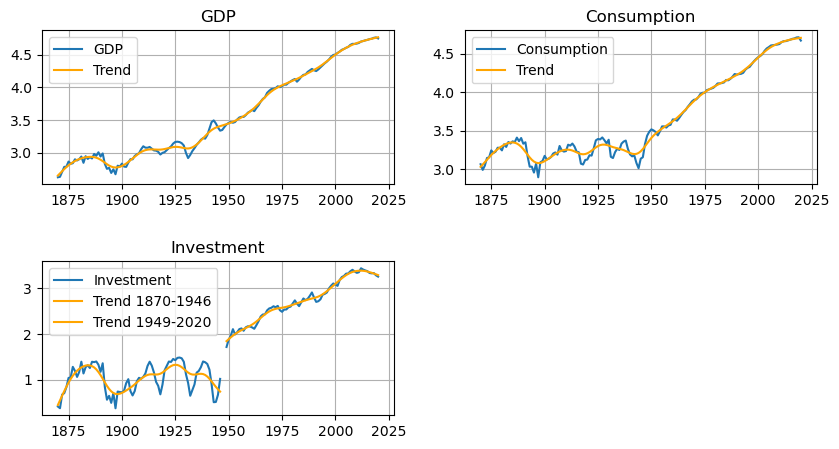

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.gridspec as gridspec
 
cons_cycle, cons_trend = sm.tsa.filters.hpfilter(np.log(df['rconsbarro']), lamb=100)
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(np.log(df['rgdpbarro']), lamb=100)
#Calculation of trends only for the selected periods
inv_data = np.log(df['rinvbarro']) #Conversion of investment data to a logarithmic scale
#Splitting data for the two periods
inv_data_1 = inv_data[df.index <= 1946]  # Period 1870–1946
inv_data_2 = inv_data[df.index >= 1949]  # Period 1949–2020
#Trend calculation (HP filter) for each period
inv_cycle_1, inv_trend_1 = sm.tsa.filters.hpfilter(inv_data_1, lamb=100)
inv_cycle_2, inv_trend_2 = sm.tsa.filters.hpfilter(inv_data_2, lamb=100)
#Preparing the plot
gs = gridspec.GridSpec(2, 2, hspace=0.5)
fig = plt.figure(figsize=(10, 5))
# GDP plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(np.log(df['rgdpbarro']), label='GDP')
ax1.plot(gdp_trend, label='Trend', color='orange')
ax1.set_title('GDP')
ax1.grid()
ax1.legend()
# Consumption plot
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(np.log(df['rconsbarro']), label='Consumption')
ax2.plot(cons_trend, label='Trend', color='orange')
ax2.set_title('Consumption')
ax2.grid()
ax2.legend()
# Investment plot
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(inv_data, label='Investment') #Full investment data
ax3.plot(inv_trend_1, label='Trend 1870-1946', color='orange')  # Trend for 1870–1946
ax3.plot(inv_trend_2, label='Trend 1949-2020', color='orange')   # Trend for 1949–2020
ax3.set_title('Investment')
ax3.grid()
ax3.legend()
plt.show()

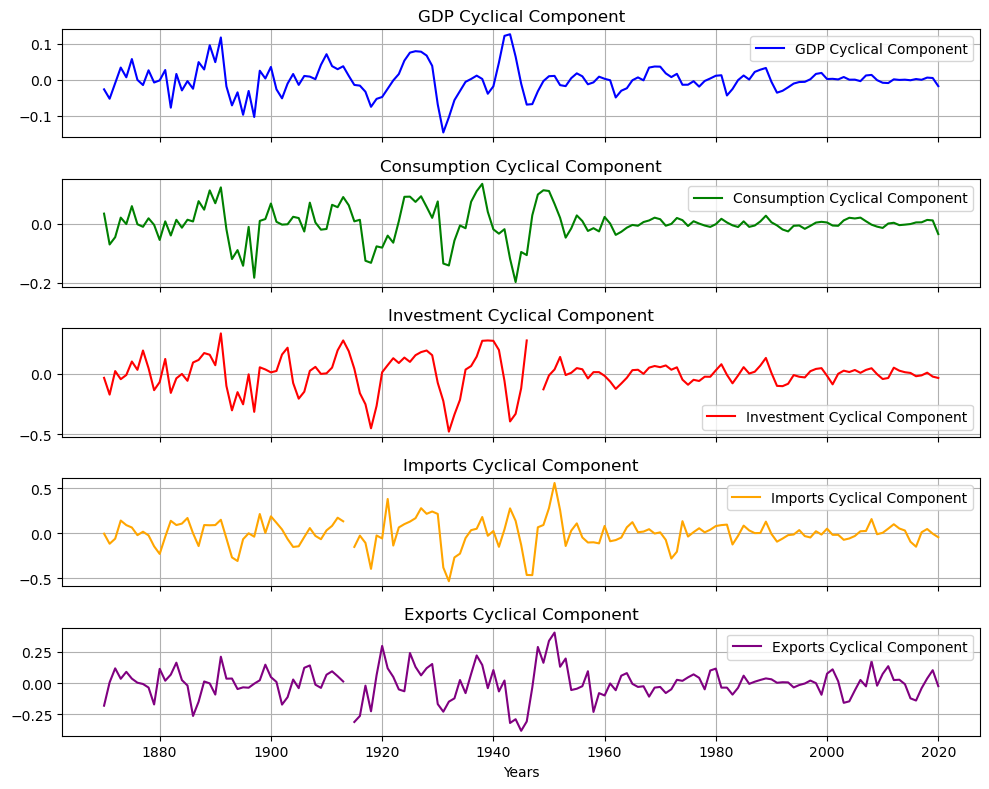

In [5]:
import matplotlib.pyplot as plt
 
#Calculation of cyclical components by removing trends
gdp_cycle = np.log(df['rgdpbarro']) - gdp_trend
cons_cycle = np.log(df['rconsbarro']) - cons_trend
 
 
#Using the already calculated trends for investments
inv_cycle_1 = inv_data_1 - inv_trend_1  #Cyclical component for the period 1870–1946
inv_cycle_2 = inv_data_2 - inv_trend_2  #Cyclical component for the period 1949–2020
 
missing_years = pd.Series([np.nan, np.nan], index=[1947, 1948])
inv_cycle = pd.concat([inv_cycle_1, missing_years, inv_cycle_2], sort=False)
 
imports_data = df['imports'].dropna()
imp_cycle, imp_trend = sm.tsa.filters.hpfilter(np.log(imports_data), lamb=100)
 
exports_data = df['exports'].dropna()
exp_cycle, exp_trend = sm.tsa.filters.hpfilter(np.log(exports_data), lamb=100)
 
imp_cycle = np.log(df['imports']) - imp_trend
exp_cycle = np.log(df['exports']) - exp_trend
 
#Plotting the cyclical components
fig, axs = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
 
axs[0].plot(gdp_cycle, label='GDP Cyclical Component', color='blue')
axs[0].set_title('GDP Cyclical Component')
axs[0].grid()
axs[0].legend()
 
axs[1].plot(cons_cycle, label='Consumption Cyclical Component', color='green')
axs[1].set_title('Consumption Cyclical Component')
axs[1].grid()
axs[1].legend()
 
axs[2].plot(inv_cycle, label='Investment Cyclical Component', color='red')
axs[2].set_title('Investment Cyclical Component')
axs[2].grid()
axs[2].legend()
 
axs[3].plot(imp_cycle, label='Imports Cyclical Component', color='orange')
axs[3].set_title('Imports Cyclical Component')
axs[3].grid()
axs[3].legend()
 
axs[4].plot(exp_cycle, label='Exports Cyclical Component', color='purple')
axs[4].set_title('Exports Cyclical Component')
axs[4].grid()
axs[4].legend()
 
plt.xlabel('Years')
plt.tight_layout()
plt.show()

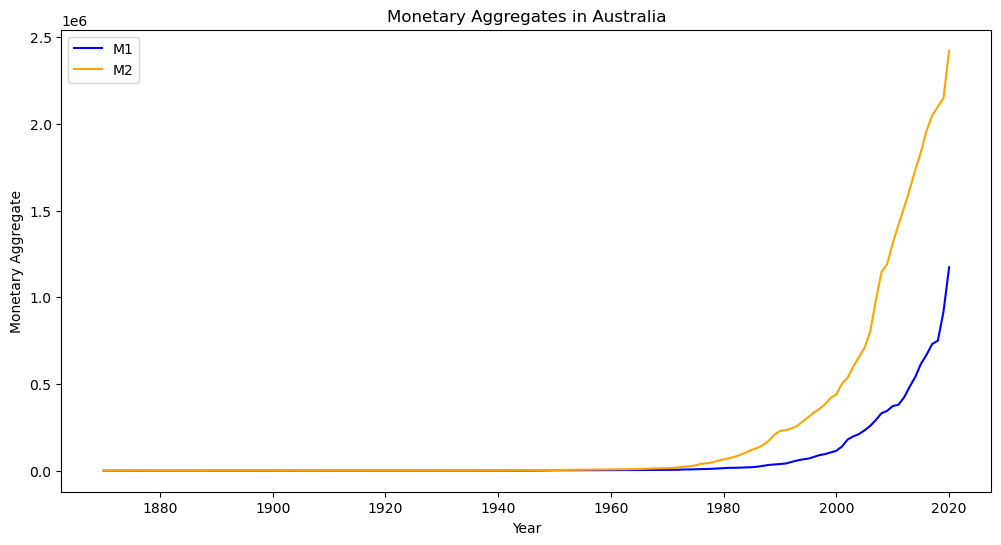

In [6]:
#2 MONETARY AGGREGATES OF AUSTRALIA
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('AUS_macro_data..xlsx')
plt.figure(figsize=(12, 6))
plt.plot(data['year'], data['narrowm'], label='M1', color='blue')
plt.plot(data['year'], data['money'], label='M2', color='orange')
plt.title('Monetary Aggregates in Australia')
plt.xlabel('Year')
plt.ylabel('Monetary Aggregate')
plt.legend()
plt.show()

C:\Users\mneaa\AppData\Local\Temp\ipykernel_19616\995472324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_data['M1_growth'] = monetary_data['narrowm'].pct_change() * 100
C:\Users\mneaa\AppData\Local\Temp\ipykernel_19616\995472324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_data['M2_growth'] = monetary_data['money'].pct_change() * 100


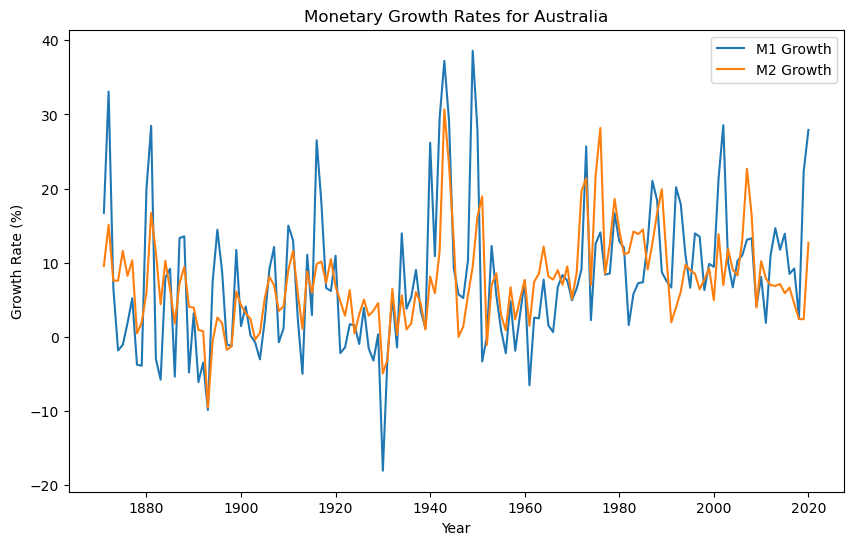

In [7]:
import pandas as pd
data = pd.read_excel('AUS_macro_data..xlsx')
monetary_data = data[['year', 'narrowm', 'money']]
 
monetary_data['M1_growth'] = monetary_data['narrowm'].pct_change() * 100
monetary_data['M2_growth'] = monetary_data['money'].pct_change() * 100
 
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 6))
plt.plot(monetary_data['year'], monetary_data['M1_growth'], label='M1 Growth')
plt.plot(monetary_data['year'], monetary_data['M2_growth'], label='M2 Growth')
plt.title('Monetary Growth Rates for Australia')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

C:\Users\mneaa\AppData\Local\Temp\ipykernel_19616\73294264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_data['M1_growth'] = monetary_data['narrowm'].pct_change() * 100
C:\Users\mneaa\AppData\Local\Temp\ipykernel_19616\73294264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_data['M2_growth'] = monetary_data['money'].pct_change() * 100


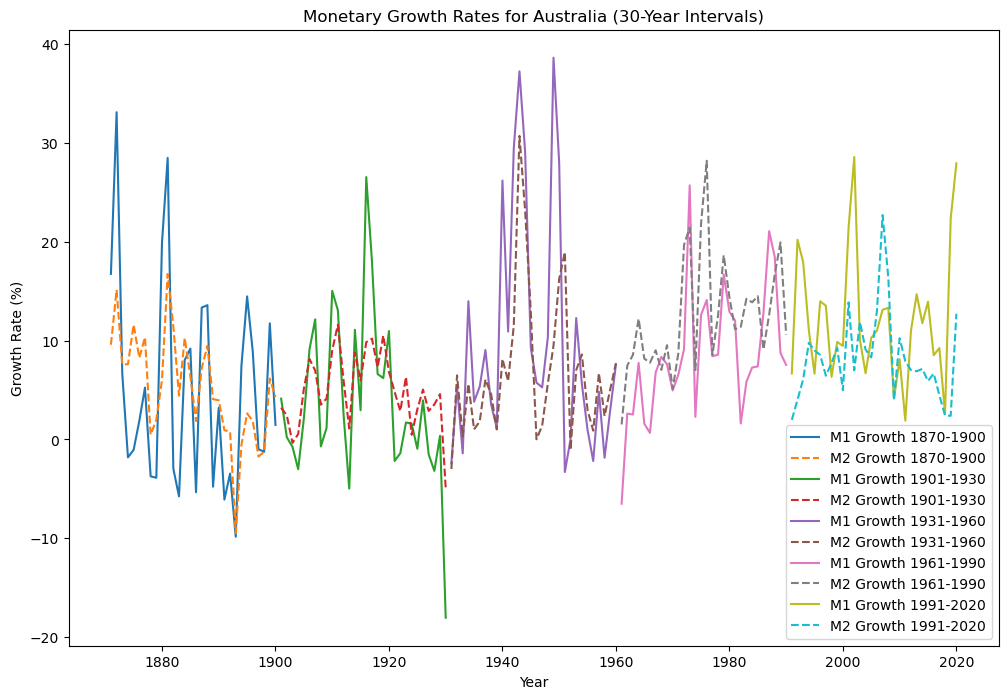

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
 
 
data = pd.read_excel('AUS_macro_data..xlsx')
monetary_data = data[['year', 'narrowm', 'money']]
 
 
monetary_data['M1_growth'] = monetary_data['narrowm'].pct_change() * 100
monetary_data['M2_growth'] = monetary_data['money'].pct_change() * 100
 
 
intervals = [(1870, 1900), (1901, 1930), (1931, 1960), (1961, 1990), (1991, 2020)]
 
 
plt.figure(figsize=(12, 8))
for start, end in intervals:
    subsample = monetary_data[(monetary_data['year'] >= start) & (monetary_data['year'] <= end)]

    plt.plot(subsample['year'], subsample['M1_growth'], label=f'M1 Growth {start}-{end}')
    plt.plot(subsample['year'], subsample['M2_growth'], label=f'M2 Growth {start}-{end}', linestyle='--')
 
 
plt.title('Monetary Growth Rates for Australia (30-Year Intervals)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

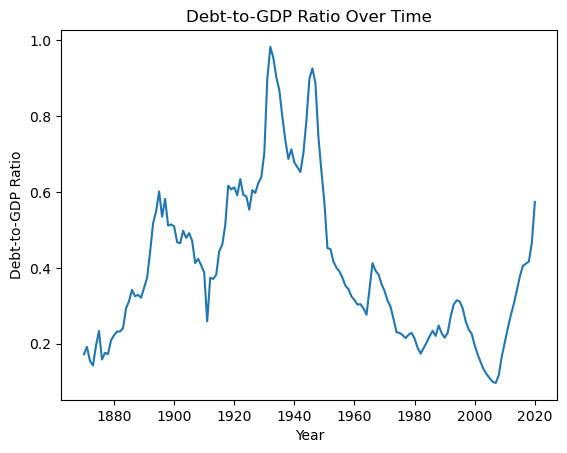

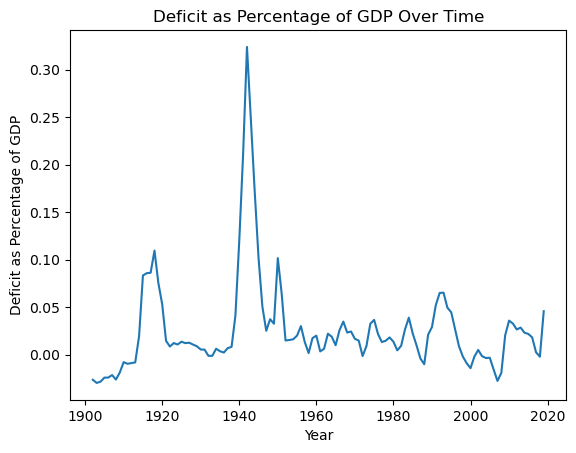

In [9]:
#3 FISCAL SUSTAINABILITY ANALYSIS OF AUSTRALIA
import pandas as pd
import statsmodels.api as sm
 
df = pd.read_excel('AUS_macro_data..xlsx')
 
 
import matplotlib.pyplot as plt
 
# Plot Debt-to-GDP over time
plt.plot(df['year'], df['debtgdp'])
plt.title('Debt-to-GDP Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt-to-GDP Ratio')
plt.show()
 
df['Deficit'] = df['expenditure'] - df['revenue']
 
df['Deficit_as_GDP'] = df['Deficit'] / df['gdp']  
plt.plot(df['year'], df['Deficit_as_GDP'])
plt.title('Deficit as Percentage of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Deficit as Percentage of GDP')
plt.show()


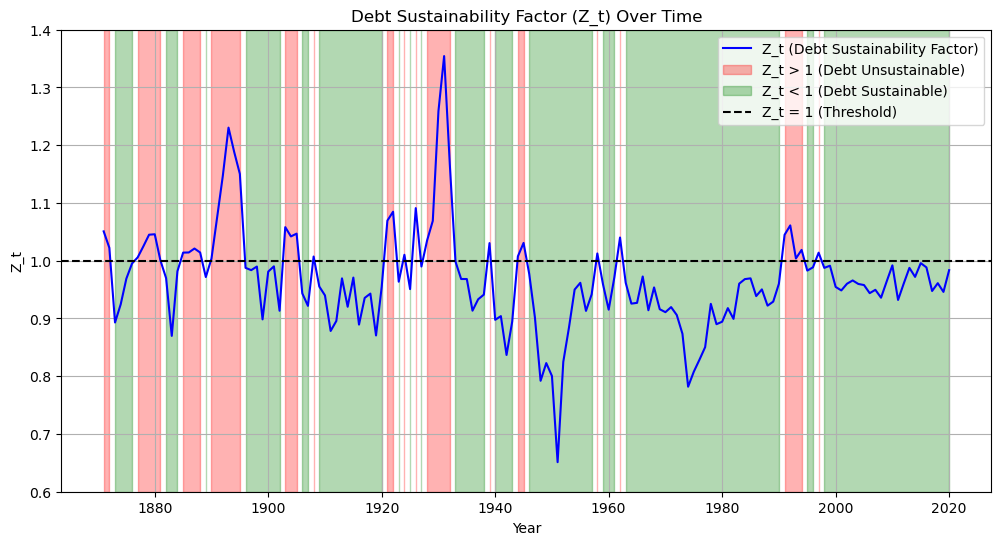

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
 
#I assume your data is in the file provided.
df = pd.read_excel('AUS_macro_data..xlsx')
 
#Calculations for the indices
df['inflation_rate'] = df['cpi'].pct_change()
df['gdp_growth_rate'] = df['gdp'].pct_change()
df['nominal_interest_rate'] = df['ltrate']
df['Z_t'] = (1 + df['nominal_interest_rate'] / 100) / ((1 + df['inflation_rate']) * (1 + df['gdp_growth_rate']))
 
#Creating the plot
plt.figure(figsize=(12, 6))
 
#Plotting the Z_t line
plt.plot(df['year'], df['Z_t'], label='Z_t (Debt Sustainability Factor)', color='blue')
 
#Shading areas above and below the blue line
plt.fill_between(df['year'], 1.4, 0.6, where=(df['Z_t'] > 1), color='red', alpha=0.3, label='Z_t > 1 (Debt Unsustainable)')
plt.fill_between(df['year'], 1.4, 0.6, where=(df['Z_t'] < 1), color='green', alpha=0.3, label='Z_t < 1 (Debt Sustainable)')
 
#Adding a horizontal line at 1.0
plt.axhline(y=1.0, color='black', linestyle='--', label='Z_t = 1 (Threshold)')
 
#Adjusting title, labels, and scale settings
plt.title('Debt Sustainability Factor (Z_t) Over Time')
plt.xlabel('Year')
plt.ylabel('Z_t')
plt.ylim(0.6, 1.4) #Vertical axis scale adjustment
plt.legend()
plt.grid()
 
#Displaying the plot
plt.show()